# Lab | Customer Analysis Round 4
In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the marketing_customer_analysis.csv file. You have been using the same data in the previous labs (round 2 and 3). You can continue using the same jupyter file. The file can be found in the files_for_lab folder.

## Get the data
Use the jupyter file from the last lab (Customer Analysis Round 3)

## Complete the following task
- Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
    - Use seaborn library to construct distribution plots for the numerical variables
    - Use Matplotlib to construct histograms
    - Do the distributions for different numerical variables look like a normal distribution
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [4]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

## Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [10]:
numerical = df.select_dtypes(include=[np.number])
categoricals = df.select_dtypes(include=[object])

In [8]:
categoricals.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


## Now we will try to check the normality of the numerical variables visually

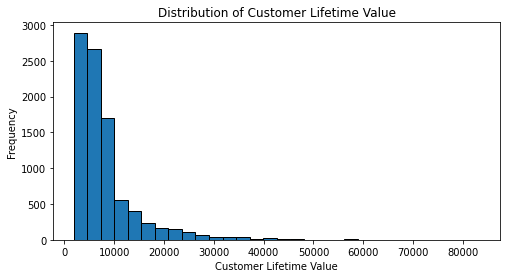

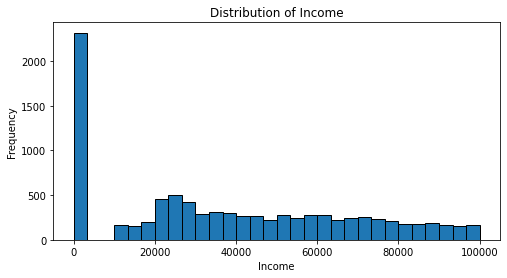

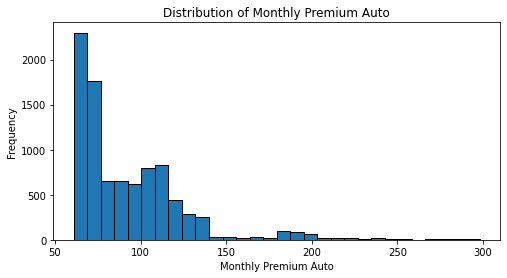

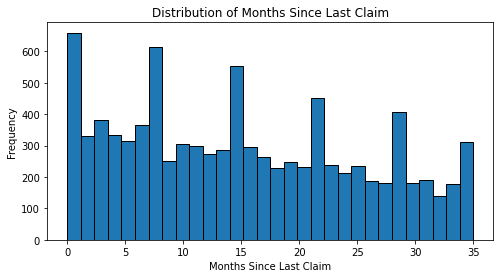

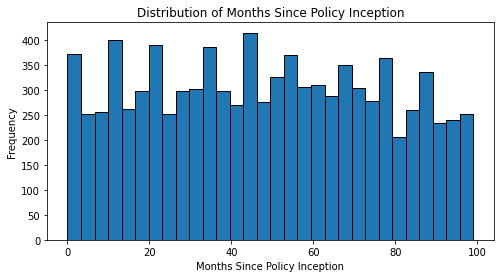

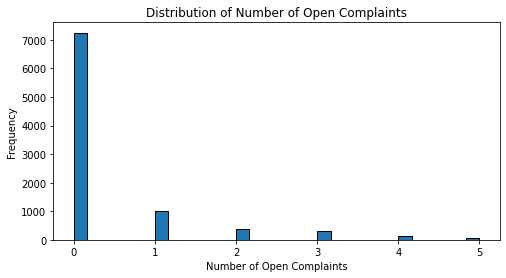

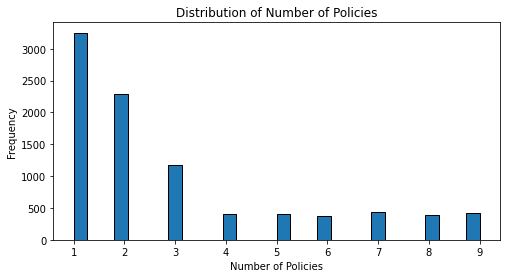

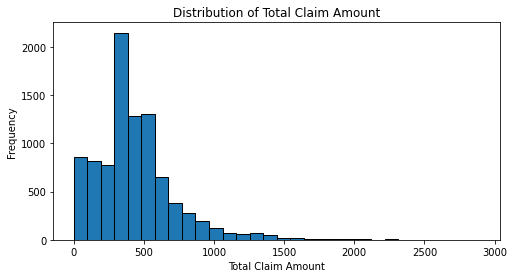

In [11]:
import matplotlib.pyplot as plt

for column in numerical.columns:
    plt.figure(figsize=(8, 4))
    plt.hist(numerical[column], bins=30, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

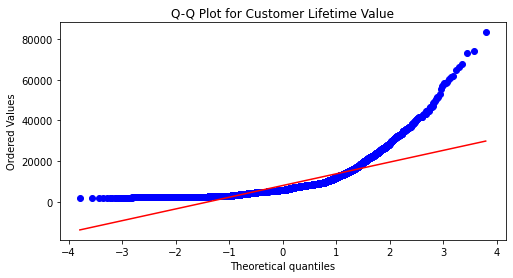

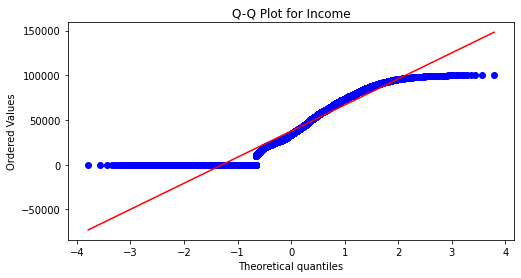

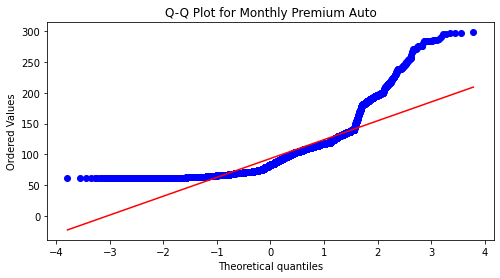

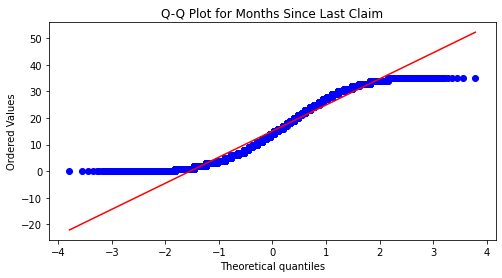

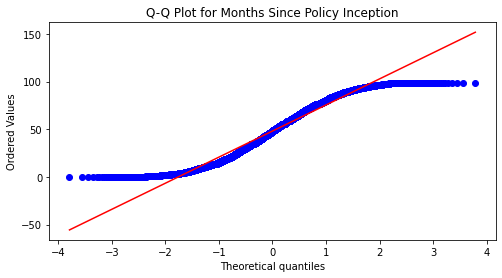

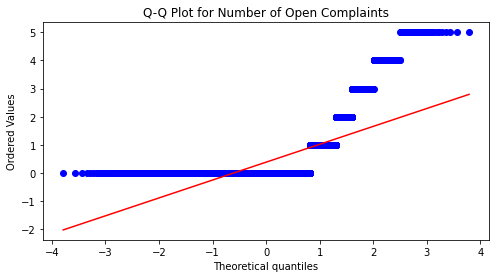

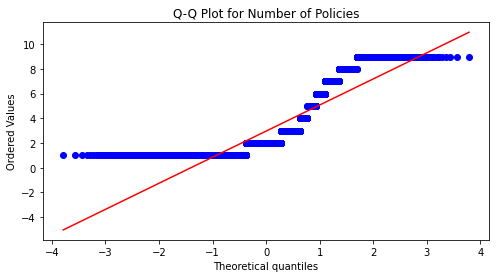

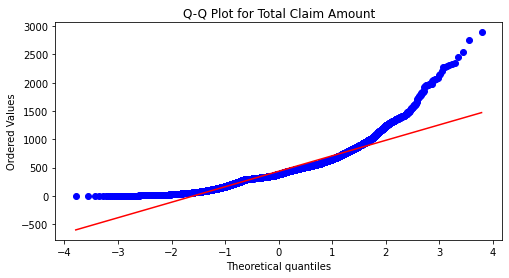

In [12]:
import scipy.stats as stats

for column in numerical.columns:
    plt.figure(figsize=(8, 4))
    stats.probplot(numerical[column].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {column}')
    plt.show()

A Q-Q plot is used to compare the quantiles of a distribution with a normal distribution. Points lying on the line y=x indicate normality.

In the Q-Q plots, if your data is normally distributed, the points will fall approximately along the line. Deviations from the line suggest deviations from normality.

These plots can help you assess the normality of your variables. However, visual inspection is subjective. For a more objective assessment, you can complement these plots with statistical normality tests like the Shapiro-Wilk test or the Kolmogorov-Smirnov test. Remember, real-world data rarely follows a perfect normal distribution, so some deviation from these patterns is common.

## About Normality


Normality in statistics refers to the assumption that a dataset is normally distributed, which means it follows a bell curve or Gaussian distribution. This concept is crucial in many statistical methods and tests. Here are some key points about normality:

1. Bell Curve Shape:

In a normal distribution, the data forms a symmetric bell-shaped curve when plotted. This curve is characterized by the following:

    - The peak of the curve is at the mean (average) of the data.
    - The distribution is symmetric around the mean, meaning data values are more frequent around the mean and less frequent as they move away from the mean in either direction.
- The standard deviation (a measure of data spread) determines the width of the bell curve.


2. Properties of a Normal Distribution:

    - Empirical Rule: About 68% of the data falls within one standard deviation of the mean, 95% within two standard deviations, and 99.7% within three standard deviations.

    - Skewness and Kurtosis: In a perfectly normal distribution, skewness (measure of asymmetry) is 0, and kurtosis (measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution) is 


3. Importance in Statistical Analysis:

    - Many statistical tests and methods, such as t-tests and ANOVA, are based on the assumption of normality. They assume that the underlying data follows a normal distribution.
    - The Central Limit Theorem states that, under certain conditions, the sum of a large number of random variables, regardless of their distribution, will approximately follow a normal distribution. This theorem supports the use of normality in many statistical methods.

4. Checking for Normality:

Normality can be checked using various methods:

    - Graphical Methods: Histograms and Q-Q plots visually assess whether the data follows a normal distribution.
    - Statistical Tests: Shapiro-Wilk, Kolmogorov-Smirnov, and Anderson-Darling tests are examples of tests used to statistically determine if a dataset is normally distributed.


5. Real-World Data:
    In practice, perfectly normal distributions are rare. Many datasets exhibit some degree of non-normality, such as skewness or heavy tails. In such cases, data transformation techniques or non-parametric statistical methods, which do not assume normality, might be appropriate.

Understanding normality is essential in statistics, as it influences the choice of statistical methods and the interpretation of results.

## Use seaborn library to construct distribution plots for the numerical variables

In [13]:
import seaborn as sns

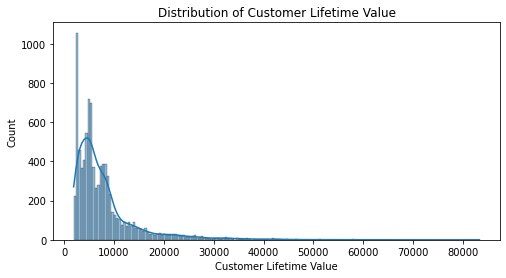

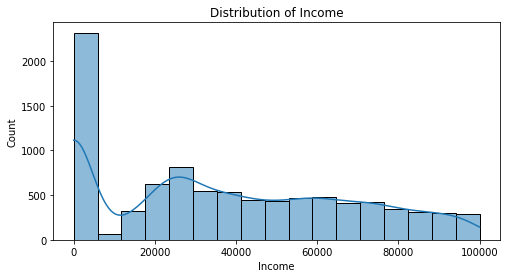

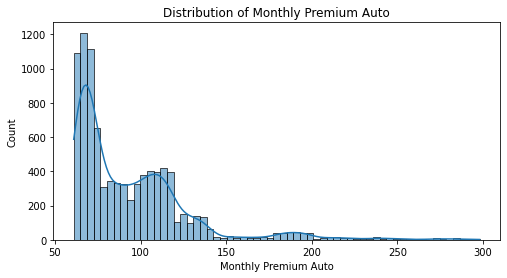

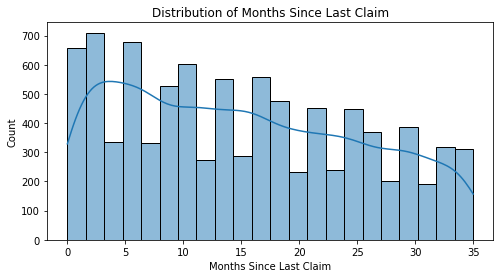

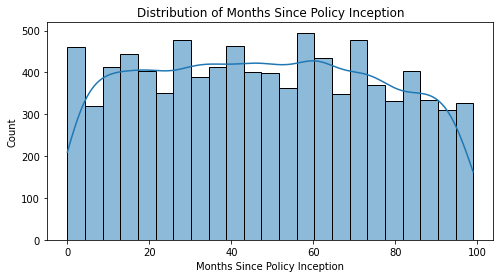

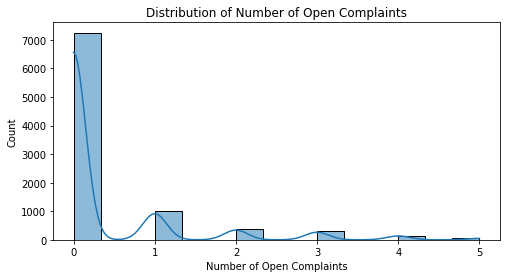

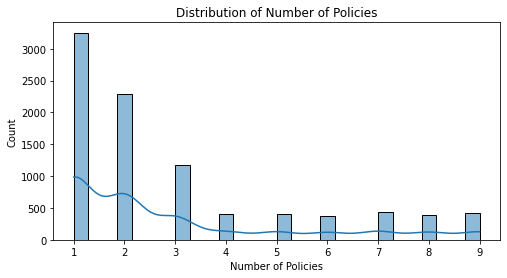

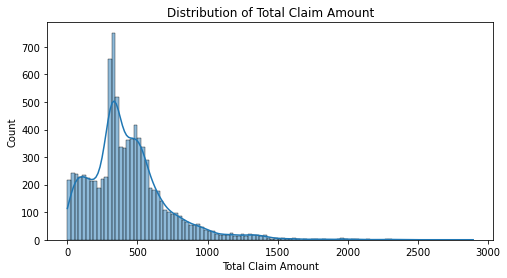

In [14]:
for column in numerical.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(numerical[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


## For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

### About Multicollinearity


Multicollinearity is a statistical concept used primarily in the context of regression analysis. It occurs when two or more predictor variables (also known as independent variables) in a statistical model are highly correlated, meaning that one can be linearly predicted from the others with a substantial degree of accuracy. In simpler terms, multicollinearity exists when similar information is provided by more than one variable in the model. Here are some key points about multicollinearity:

1. Implications:

    - Estimation Issues: Multicollinearity can make the estimates of the regression coefficients unreliable. The coefficients may fluctuate erratically in response to small changes in the model or the data.
    - Inflated Standard Errors: It typically results in inflated standard errors for the coefficients, leading to a reduction in statistical power (the probability of correctly detecting a significant effect).
    - Misleading Results: The significance of the predictor variables can be misrepresented. A variable that is actually important might not appear to be, and vice-versa.

2. Detection:

    - It is detected using various methods, such as examining correlation coefficients, Variance Inflation Factor (VIF), tolerance levels, or eigenvalues.


3. Causes:

    - Common causes include over-specifying the model with too many variables, creating derived variables that are related to each other (like using both age and age-squared in the same model), and using dummy variables incorrectly (like including a dummy variable for every category of a categorical variable without omitting one category).


4. Solutions:

    - Remove Variables: One of the simplest ways to address multicollinearity is by removing some of the highly correlated independent variables.
    - Combine Variables: In some cases, combining correlated variables into a single variable can be effective.
    - Principal Component Analysis (PCA): PCA can be used to reduce the feature set to a lower-dimensional space.
    - Regularization Methods: Techniques like Ridge Regression or LASSO can help in dealing with multicollinearity by adding a penalty term to the regression model.


5. Not Always a Problem:

    - In some types of analysis, multicollinearity is not necessarily a problem, especially if the goal is prediction rather than interpreting the coefficients. For example, in machine learning models where prediction accuracy is the main objective, multicollinearity might not be a major concern.


Understanding multicollinearity is crucial in regression analysis as it affects the interpretation of the coefficients, the statistical significance of the independent variables, and the overall reliability of the model.

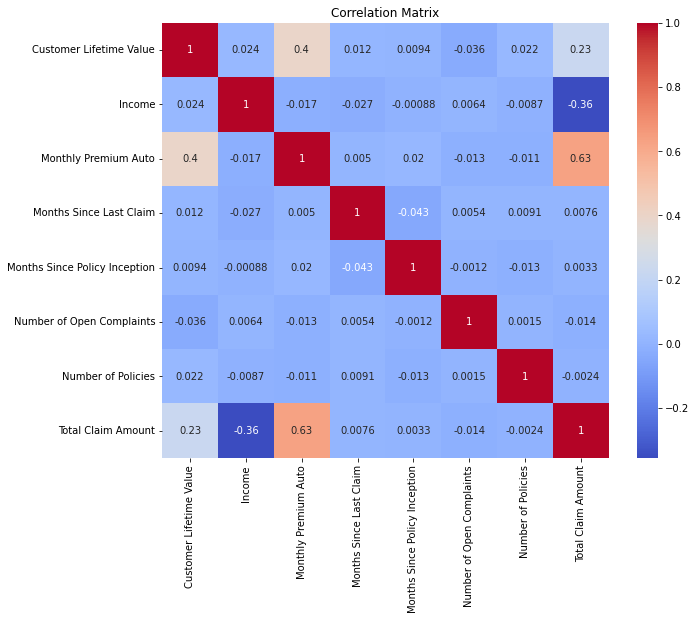

In [18]:
# Assuming 'numerical' is your DataFrame containing numerical features
correlation_matrix = numerical.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Variance Inflation Factor (VIF):

VIF is a more direct method to check for multicollinearity. It quantifies how much the variance of an estimated regression coefficient increases if your predictors are correlated. A VIF value greater than 5 or 10 indicates high multicollinearity between this variable and the other

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for each feature
VIF = pd.DataFrame()
VIF['Variable'] = numerical.columns
VIF['VIF'] = [variance_inflation_factor(numerical.values, i) for i in range(numerical.shape[1])]

print(VIF)


                        Variable        VIF
0        Customer Lifetime Value   2.806978
1                         Income   2.831329
2           Monthly Premium Auto  14.130566
3        Months Since Last Claim   2.784766
4  Months Since Policy Inception   3.267760
5      Number of Open Complaints   1.166620
6             Number of Policies   2.299313
7             Total Claim Amount   6.666879


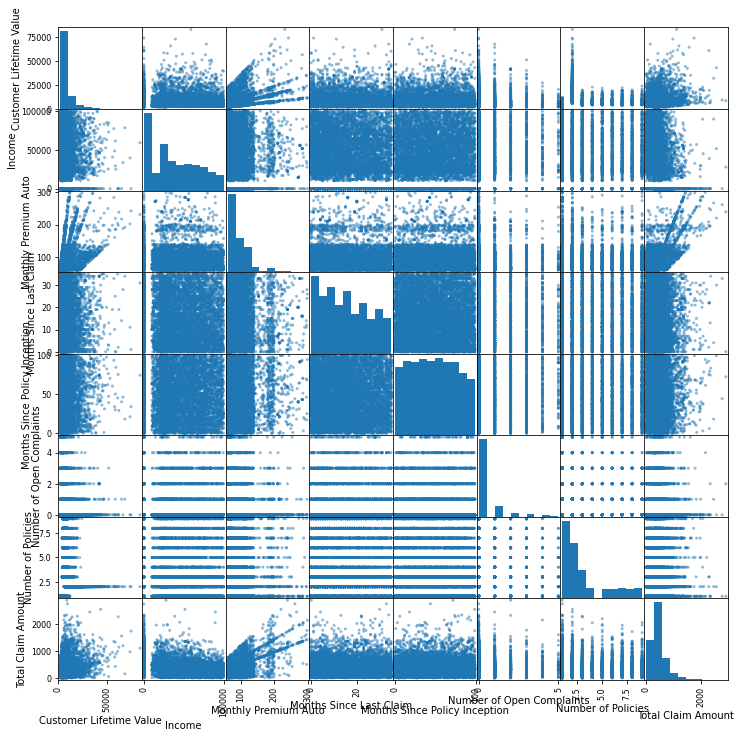

In [17]:
pd.plotting.scatter_matrix(numerical, figsize=(12, 12))
plt.show()

In [ ]:
Nothing to drop in Corelation coefficient
Monthly Premium auto has to be drop dueto high VIF